In [7]:
# -*- coding: utf-8 -*-

# 代码3-1 使用describe()方法即可查看数据的基本情况
import pandas as pd

catering_sale = '../data/catering_sale.xls'  # 餐饮数据
data = pd.read_excel(catering_sale, index_col=u'日期')  # 读取数据，指定“日期”列为索引列
print(data.describe())

                销量
count   200.000000
mean   2755.214700
std     751.029772
min      22.000000
25%    2451.975000
50%    2655.850000
75%    3026.125000
max    9106.440000


异常值： [22.0 51.0 60.0 865.0 4060.3 4065.2 6607.4 9106.44]


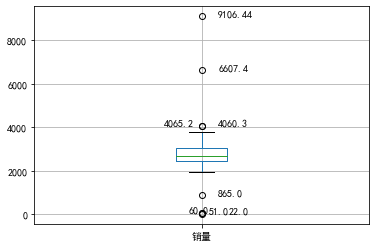

In [8]:
# 代码3-2 餐饮销额数据异常值检测

import matplotlib.pyplot as plt  # 导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.figure()  # 建立图像
p = data.boxplot(return_type='dict')  # 画箱线图，直接使用DataFrame的方法
x = p['fliers'][0].get_xdata()  # 'fliers'即为异常值的标签
y = p['fliers'][0].get_ydata()
y.sort()  # 从小到大排序，该方法直接改变原对象
print("异常值：",y)
'''
用annotate添加注释
其中有些相近的点，注解会出现重叠，难以看清，需要一些技巧来控制
以下参数都是经过调试的，需要具体问题具体调试。
'''
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i], xy=(x[i], y[i]), xytext=(x[i] + 0.05 - 0.8 / (y[i] - y[i - 1]), y[i]))
    else:
        plt.annotate(y[i], xy=(x[i], y[i]), xytext=(x[i] + 0.08, y[i]))

plt.show()  # 展示箱线图